In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [14]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
data = data[['Sales', 'TV', 'Radio', 'Newspaper']]
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Sales,TV,Radio,Newspaper
0,22.100,230.100,37.800,69.200
1,10.400,44.500,39.300,45.100
2,9.300,17.200,45.900,69.300
3,18.500,151.500,41.300,58.500
4,12.900,180.800,10.800,58.400



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


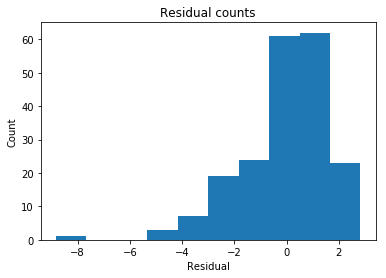

In [81]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

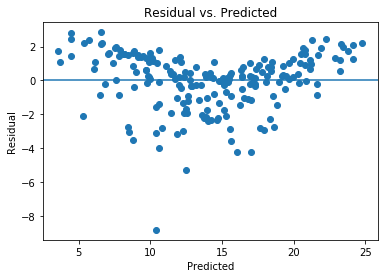

In [82]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [83]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


In [84]:
data['residual'] = residual

In [85]:
data.loc[data['residual'] < -6]

,Sales,TV,Radio,Newspaper,residual
130,1.600,0.700,39.600,8.700,-8.828


In [86]:
data = data.drop([0,130])

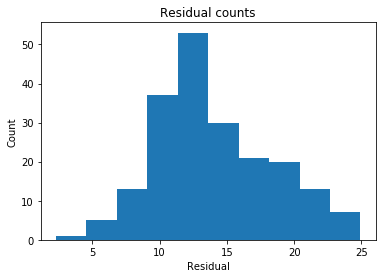

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scalerX = StandardScaler().fit(X)
scalerY = StandardScaler().fit(Y.reshape(-1,1)) # Have to reshape to avoid warnings

normed_X = scalerX.transform(X)
normed_y = scalerY.transform(Y.reshape(-1,1)) # Have to reshape to avoid warnings

normed_y = normed_y.ravel()
# Calculate the error, also called the residual.
lr = linear_model.LinearRegression()
lr.fit(normed_X,normed_y)
predicted_2 = lr.predict(normed_X).ravel()
actual_2 = data['Sales']
residual_2 = actual_2 - predicted_2

# This looks a bit concerning.
plt.hist(residual_2)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

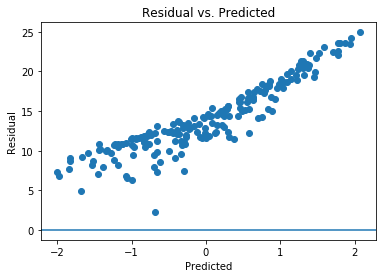

In [33]:
plt.scatter(predicted_2, residual_2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

That looks much more like a regression.